In [1]:
from matplotlib import pyplot as plt
from model import LLM, LLMconfig
import torch
# ckpt = torch.load('llm_model.pt', weights_only=False)
dense = torch.load('dense.pt', weights_only=False)
moe = torch.load('moe.pt', weights_only=False)
iters = 5000
eval_int = 200

In [2]:
dense_replica = LLM(dense['config'])
moe_replica = LLM(moe['config'])

print(f"Parameters (total/active) in Dense model: {dense_replica.get_num_params()}")
print(f"Parameters (total/active) in MoE model: {moe_replica.get_num_params()}")

Parameters (total/active) in Dense model: (28284672, 28284672)
Parameters (total/active) in MoE model: (40115712, 25959936)


In [3]:
dense_iters, dense_train_losses = range(iters)[eval_int:] , dense['losses']['train'][eval_int:-1]
dense_val_iters, dense_valrun_val_losses, dense_valrun_train_losses = range(0,iters,eval_int), dense['losses']['valrun_val'], dense['losses']['valrun_train']
print((len(dense_iters), len(dense_train_losses)), (len(dense_val_iters), len(dense_valrun_val_losses), len(dense_valrun_train_losses)))


moe_iters, moe_train_losses = range(iters)[eval_int:] , moe['losses']['train'][eval_int:-1]
moe_val_iters, moe_valrun_val_losses, moe_valrun_train_losses = range(0,iters,eval_int), moe['losses']['valrun_val'], moe['losses']['valrun_train']
print((len(moe_iters), len(moe_train_losses)), (len(moe_val_iters), len(moe_valrun_val_losses), len(moe_valrun_train_losses)))

(4800, 4800) (25, 25, 25)
(4800, 4800) (25, 25, 25)


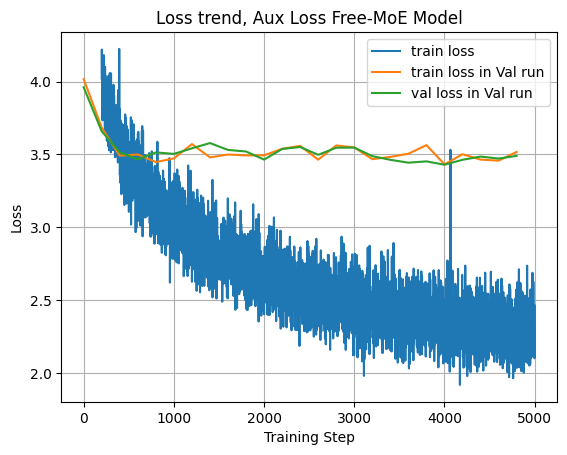

In [4]:
plt.plot(dense_iters, dense_train_losses, label='train loss')
plt.plot(dense_val_iters, dense_valrun_train_losses, label='train loss in Val run')
plt.plot(dense_val_iters, dense_valrun_val_losses, label='val loss in Val run')
plt.grid(True)
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title("Loss trend, Aux Loss Free-MoE Model")
plt.legend()

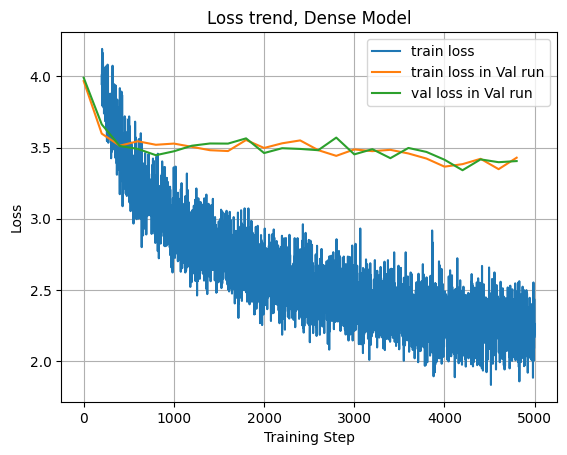

In [5]:
plt.plot(moe_iters, moe_train_losses, label='train loss')
plt.plot(moe_val_iters, moe_valrun_train_losses, label='train loss in Val run')
plt.plot(moe_val_iters, moe_valrun_val_losses, label='val loss in Val run')
plt.grid(True)
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title("Loss trend, Dense Model")
plt.legend()